In [1]:
from tensorflow import keras
dataset = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
(X_train, y_train), (X_test, y_test) = dataset

In [0]:
import matplotlib.pyplot as plt


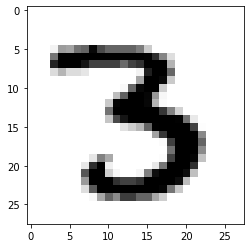

In [4]:
plt.imshow(X_train[12], cmap='binary')


In [5]:
y_train[12]

3

### Scaling the Data

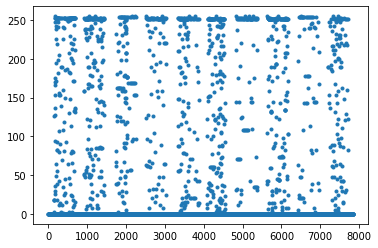

In [6]:
plt.plot(X_train[:10].reshape(-1,1), '.') #distribution

In [0]:
import numpy as np

In [8]:
100000/5 , 10/5 #range of the distribition has change

(20000.0, 2.0)

## Checking for Outliers

when a data doesnot belong to that poplulation is known as an outlier.

A population is a distribution of data in a particular range

In [9]:
np.array([1,1,2,3,5,3,4,4,2,5,1.2, 4, 3]).mean()

2.9384615384615387

In [10]:
np.array([1,1,2,3,5,3,4,4,2,5,1.2, 4, 300]).mean()

25.784615384615385

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


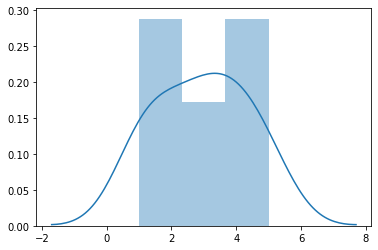

In [12]:
sns.distplot(np.array([1,1,2,3,5,3,4,4,2,5,1.2, 4, 3]))

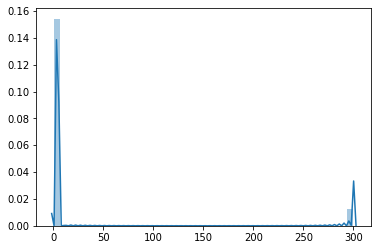

In [13]:
sns.distplot(np.array([1,1,2,3,5,3,4,4,2,5,1.2, 4, 300]))

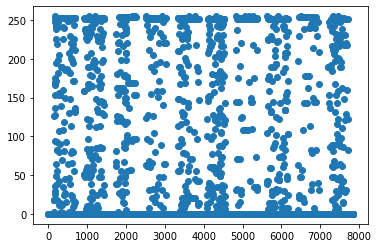

In [14]:
plt.plot(X_train[:10].reshape(-1,1), 'o')

In [15]:
X_train[0].shape

(28, 28)

## Reducing the effect of Outliers

In [0]:
from sklearn.preprocessing import RobustScaler 
# For images, vidoes, Audios

In [0]:
scale = RobustScaler()

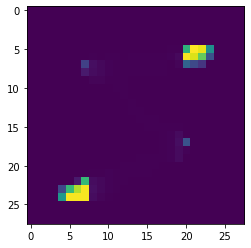

In [18]:
plt.imshow(scale.fit_transform(X_train[0]))

As a result, We can see if we remove the outlier, the entire image got changed. 

So we cannot remove the outlier, But we can scale the data set ( Divide the entire dataset by the highest number). Also it makes the image processing faster.

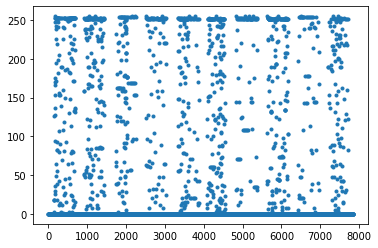

In [19]:
plt.plot(X_train[:10].reshape(-1,1), '.')

In [0]:
#scaled the dataset
#why? so that the image processing will be faster. 
X_train = X_train/255. 
X_test = X_test/255.

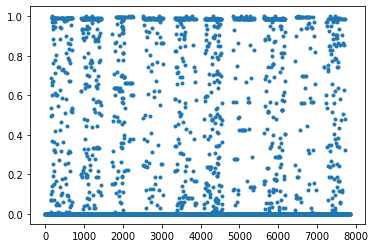

In [21]:
plt.plot(X_train[:10].reshape(-1,1), '.')

Yes, We can see the y axis data is reduced 

## Building a Model

In [0]:
model = keras.models.Sequential()

#Flattening the Model
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))

#Adding a dense Layer
model.add(keras.layers.Dense(200)) #increase the neuron
model.add(keras.layers.Activation('relu'))

#Adding an output layer (output categories must be same as that of input)
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


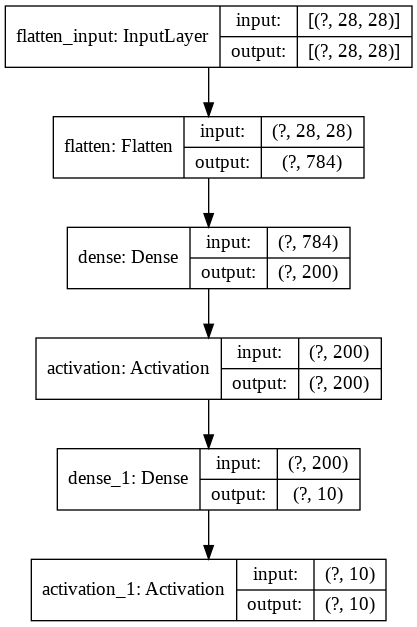

In [24]:
keras.utils.plot_model(model, 'MNIST.png', show_shapes=True )

In [0]:
#compiling and optimizing the model using SGD

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 3s 3ms/step - loss: 0.7366 - accuracy: 0.8217 - val_loss: 0.4041 - val_accuracy: 0.8900
Epoch 2/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8988 - val_loss: 0.3304 - val_accuracy: 0.9081
Epoch 3/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.9119 - val_loss: 0.2928 - val_accuracy: 0.9181
Epoch 4/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.9218 - val_loss: 0.2705 - val_accuracy: 0.9229
Epoch 5/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9287 - val_loss: 0.2518 - val_accuracy: 0.9288
Epoch 6/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9329 - val_loss: 0.2352 - val_accuracy: 0.9334
Epoch 7/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2213 - accuracy: 0.9377 - val_loss: 0.2235 - val_accuracy:

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1209 - accuracy: 0.9660


[0.12087075412273407, 0.9660000205039978]

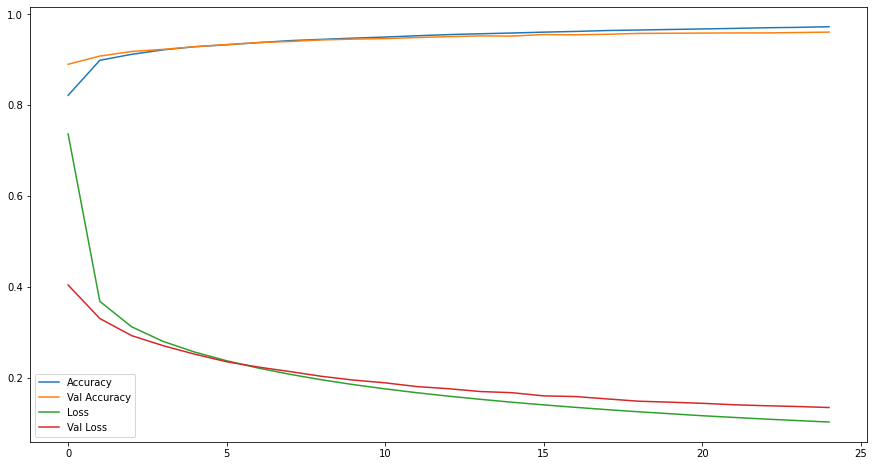

In [28]:
plt.figure(figsize=(15,8))

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

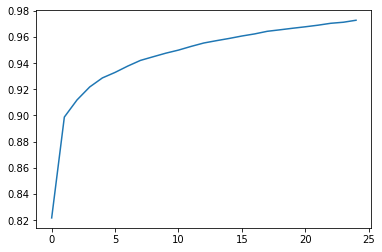

In [29]:
plt.plot(history.history['accuracy'])